## Experiment reporter
* Tool for analysing the experiment results, stored in loggers


In [ ]:
import pickle
from detector.reporter import Reporter

with open('drift/logs_cesnet_miners22_ppi-evaluation-retrained.pkl', 'rb') as inp:
    logger_retrained = pickle.load(inp)
with open('drift/logs_cesnet_miners22_ppi-evaluation.pkl', 'rb') as inp:
    logger_reference = pickle.load(inp)

reporter_retrained = Reporter(logger_retrained, ["Retraining Model"], chunk_length=7)
reporter_reference = Reporter(logger_reference, ["Reference Model"], chunk_length=7)

### Global overview of the experiment results
Show how the experiments were defined and get the broad overview of experiment results

In [13]:
reporter_retrained.print_experiment_overview()
reporter_reference.print_experiment_overview()

1 experiments were performed, each with 196 rounds of detection,
Experiment was generated based on fixed samples window


drift_detection_count  drift_strength_mean  \
experiment                                                     
Retraining Model                      0              0.01205   

                  drift_strength_std  share_drifted_features_mean  \
experiment                                                          
Retraining Model            0.001789                          0.0   

                  share_drifted_features_std  f1_mean    f1_std  
experiment                                                       
Retraining Model                         0.0  0.99857  0.000368


The experiments and their tests were defined as follows:
Experiment 0: Retraining Model
Baseline
Global test info:
Wasserstein test compares the normalised Wasserstein distance between historical and current distribution.
A feature is concidered drifted when the distance is higher than 0.1.
The whole sample is concidered drifted when the weighed mean of all test results is higher than 0.04.

Class test info:
KS test uses the two-sample kolmogorov-smirnov test to decide whether the historical and current distributions differ. 
A feature is concidered drifted when p-value is lower than 0.05.
The whole sample is concidered drifted when the weighed mean of all test results is lower than 0.475.

Logger is present

1 experiments were performed, each with 196 rounds of detection,
Experiment was generated based on fixed samples window


drift_detection_count  drift_strength_mean  \
experiment                                                    
Reference Model                      0              0.01205   

                 drift_strength_std  share_drifted_features_mean  \
experiment                                                         
Reference Model            0.001789                          0.0   

                 share_drifted_features_std  f1_mean    f1_std  
experiment                                                      
Reference Model                         0.0  0.99857  0.000368


The experiments and their tests were defined as follows:
Experiment 0: Reference Model
Baseline
Global test info:
Wasserstein test compares the normalised Wasserstein distance between historical and current distribution.
A feature is concidered drifted when the distance is higher than 0.1.
The whole sample is concidered drifted when the weighed mean of all test results is higher than 0.04.

Class test info:
KS test uses the two-sample kolmogorov-smirnov test to decide whether the historical and current distributions differ. 
A feature is concidered drifted when p-value is lower than 0.05.
The whole sample is concidered drifted when the weighed mean of all test results is lower than 0.475.

Logger is present



 * Plotting global results leads to the first overview of differences between the experiments
    * The style of this graph cen be user defined

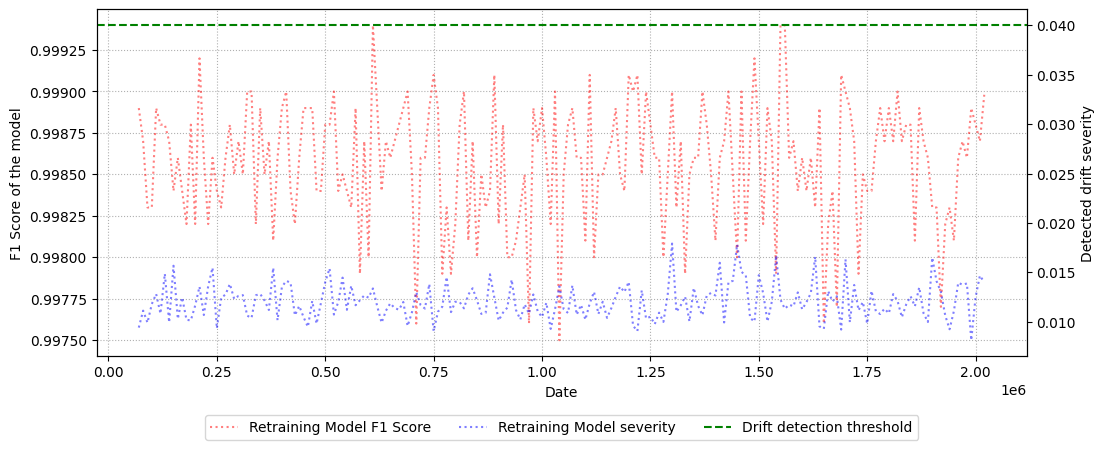

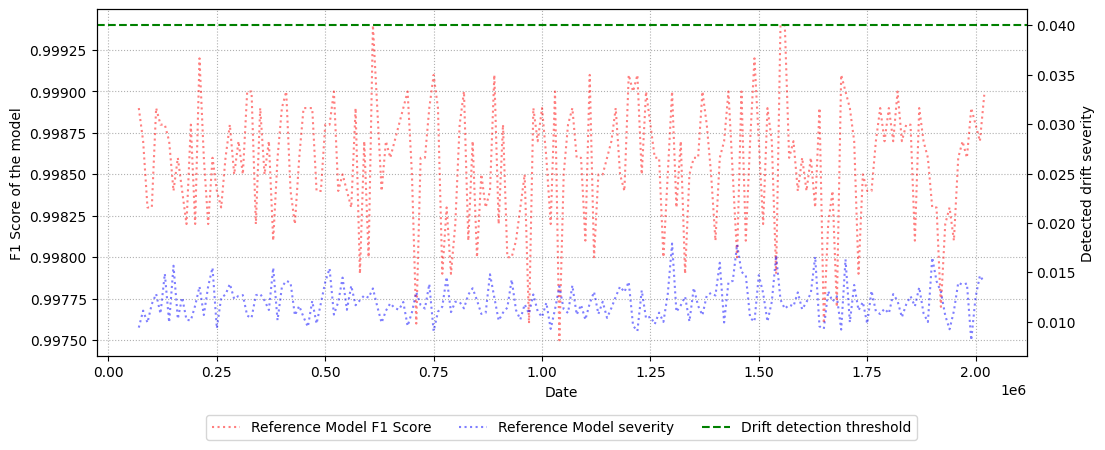

In [14]:
figure = reporter_retrained.plot_global_results(detection_threshold = 0.04,
        severity_style = [{"line": "dotted", "color": "blue", "alpha": 0.5},
                          {"line": "solid", "color": "blue", "alpha": 0.5}],
        f1_style = [{"line": "dotted", "color": "red", "alpha": 0.5},
                    {"line": "solid", "color": "red", "alpha": 0.5}],
        detection_style = [{"line": "solid", "color": "black", "alpha": 0.5},
                           {"line": "dotted", "color": "cyan", "alpha": 0.4}]
    )

figure = reporter_reference.plot_global_results(detection_threshold = 0.04,
        severity_style = [{"line": "dotted", "color": "blue", "alpha": 0.5},
                          {"line": "solid", "color": "blue", "alpha": 0.5}],
        f1_style = [{"line": "dotted", "color": "red", "alpha": 0.5},
                    {"line": "solid", "color": "red", "alpha": 0.5}],
        detection_style = [{"line": "solid", "color": "black", "alpha": 0.5},
                           {"line": "dotted", "color": "cyan", "alpha": 0.4}]
    )

### Chunk by chunk analysis
One may split the results into chunks (for example weeks) to quickly discover interesting parts of the data to further study

In [15]:
for r in reporter_retrained.get_chunk_results(sort_by="Mean_drift_strength", ascending = False):
    display(r)

for r in reporter_reference.get_chunk_results(sort_by="Mean_drift_strength", ascending = False):
    display(r)

Ratio_of_drift_detections  Mean_drift_strength  \
Chunk                                                   
19                           0.0             0.014232   
27                           0.0             0.012991   
6                            0.0             0.012824   
4                            0.0             0.012786   
2                            0.0             0.012557   
21                           0.0             0.012552   
7                            0.0             0.012514   
22                           0.0             0.012219   
10                           0.0             0.012178   
3                            0.0             0.012174   
23                           0.0             0.012146   
20                           0.0             0.012121   
11                           0.0             0.012101   
26                           0.0             0.012091   
17                           0.0             0.012015   
18                           0.0             0.011992   
15                           0.0             0.011970   
25                           0.0             0.011843   
9                            0.0             0.011563   
0                            0.0             0.011545   
12                           0.0             0.011527   
13                           0.0             0.011490   
1                            0.0             0.011486   
14                           0.0             0.011486   
24                           0.0             0.011406   
16                           0.0             0.011400   
5                            0.0             0.011164   
8                            0.0             0.011021   

       Mean_ratio_of_drifted_features  Mean_f1_score  
Chunk                                                 
19                                0.0       0.998557  
27                                0.0       0.998754  
6                                 0.0       0.998614  
4                                 0.0       0.998671  
2                                 0.0       0.998557  
21                                0.0       0.998714  
7                                 0.0       0.998586  
22                                0.0       0.998343  
10                                0.0       0.998314  
3                                 0.0       0.998671  
23                                0.0       0.998543  
20                                0.0       0.998643  
11                                0.0       0.998457  
26                                0.0       0.998214  
17                                0.0       0.998529  
18                                0.0       0.998557  
15                                0.0       0.998528  
25                                0.0       0.998714  
9                                 0.0       0.998600  
0                                 0.0       0.998671  
12                                0.0       0.998186  
13                                0.0       0.998543  
1                                 0.0       0.998471  
14                                0.0       0.998657  
24                                0.0       0.998671  
16                                0.0       0.998843  
5                                 0.0       0.998614  
8                                 0.0       0.998728

Ratio_of_drift_detections  Mean_drift_strength  \
Chunk                                                   
19                           0.0             0.014232   
27                           0.0             0.012991   
6                            0.0             0.012824   
4                            0.0             0.012786   
2                            0.0             0.012557   
21                           0.0             0.012552   
7                            0.0             0.012514   
22                           0.0             0.012219   
10                           0.0             0.012178   
3                            0.0             0.012174   
23                           0.0             0.012146   
20                           0.0             0.012121   
11                           0.0             0.012101   
26                           0.0             0.012091   
17                           0.0             0.012015   
18                           0.0             0.011992   
15                           0.0             0.011970   
25                           0.0             0.011843   
9                            0.0             0.011563   
0                            0.0             0.011545   
12                           0.0             0.011527   
13                           0.0             0.011490   
1                            0.0             0.011486   
14                           0.0             0.011486   
24                           0.0             0.011406   
16                           0.0             0.011400   
5                            0.0             0.011164   
8                            0.0             0.011021   

       Mean_ratio_of_drifted_features  Mean_f1_score  
Chunk                                                 
19                                0.0       0.998557  
27                                0.0       0.998754  
6                                 0.0       0.998614  
4                                 0.0       0.998671  
2                                 0.0       0.998557  
21                                0.0       0.998714  
7                                 0.0       0.998586  
22                                0.0       0.998343  
10                                0.0       0.998314  
3                                 0.0       0.998671  
23                                0.0       0.998543  
20                                0.0       0.998643  
11                                0.0       0.998457  
26                                0.0       0.998214  
17                                0.0       0.998529  
18                                0.0       0.998557  
15                                0.0       0.998528  
25                                0.0       0.998714  
9                                 0.0       0.998600  
0                                 0.0       0.998671  
12                                0.0       0.998186  
13                                0.0       0.998543  
1                                 0.0       0.998471  
14                                0.0       0.998657  
24                                0.0       0.998671  
16                                0.0       0.998843  
5                                 0.0       0.998614  
8                                 0.0       0.998728

### Per class analysis
Analyse different classes and find potentially problematic ones. Automatic plotting of the most drifted classes can be done, or various manual plotting functions can be used to further examine interesting behaviour

* Here, we can look at the most drifted classes, then analyse the most correlated ones or examine the model retraining effects on the most drifted class

Most drifted classes:

Experiment Retraining Model
0    0.741494
1    0.788457
dtype: float64

 Compare F1 scores between experiments:


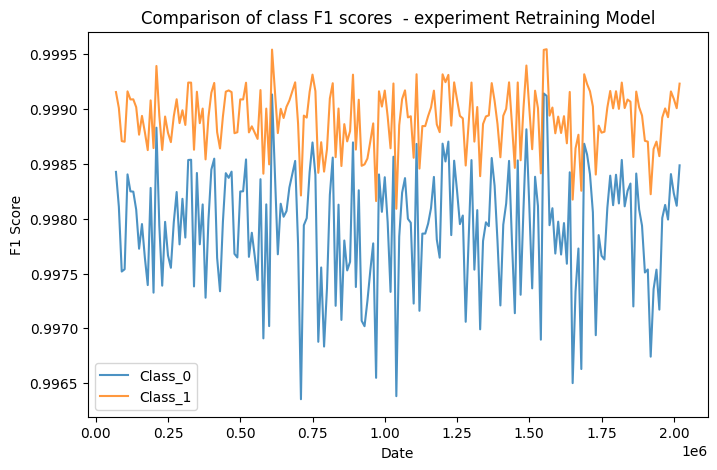

Compare drifts between experiments:


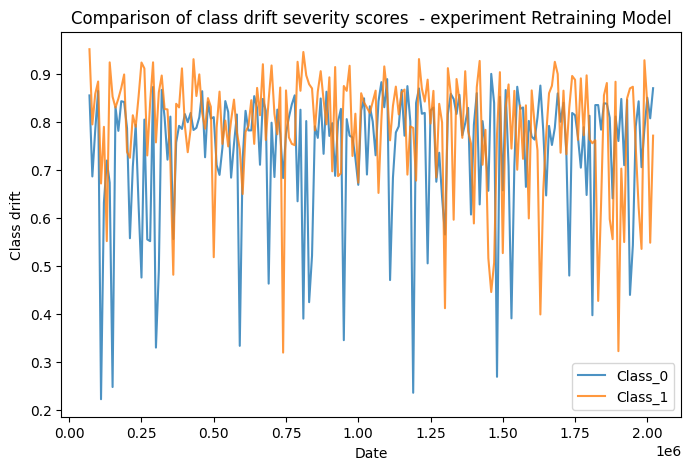

Class pairs with most correlated F1 scores
0  1    0.995722
dtype: float64

Class pairs with most correlated drifts
0  1    0.011653
dtype: float64
Most drifted classes:

Experiment Reference Model
0    0.741494
1    0.788457
dtype: float64

 Compare F1 scores between experiments:


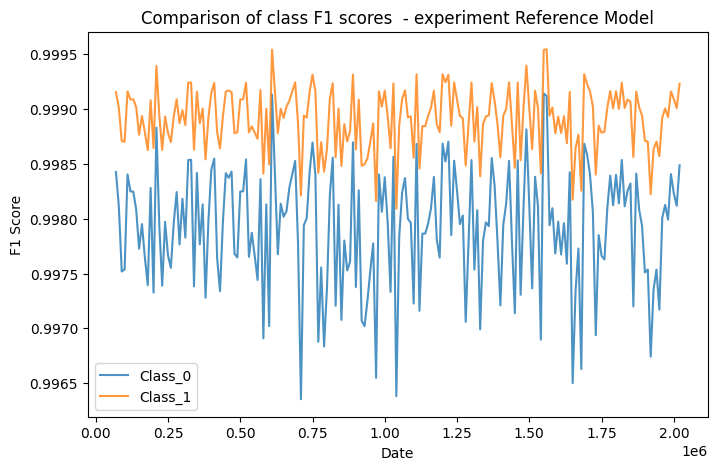

Compare drifts between experiments:


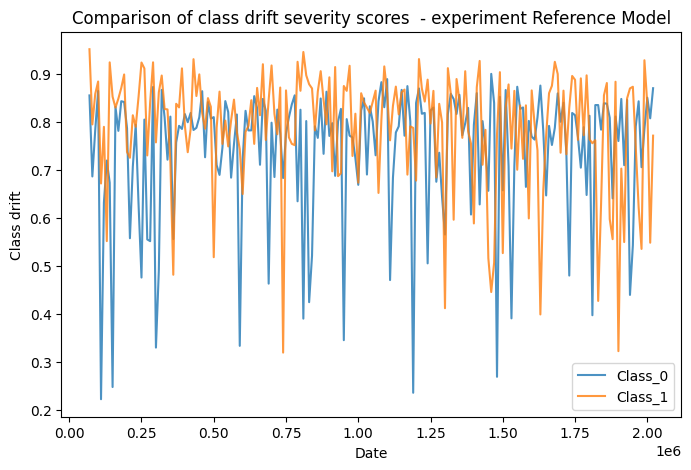

Class pairs with most correlated F1 scores
0  1    0.995722
dtype: float64

Class pairs with most correlated drifts
0  1    0.011653
dtype: float64


In [16]:
reporter_retrained.analyse_class_drift(5)

reporter_reference.analyse_class_drift(5)

In [16]:
#Example of multifeature support
#reporter_ref.plot_class("class_f1",[56,59,55])
#reporter_ref.plot_class("class_drift",[39,72])
#reporter_ref.plot_class_comparison([9,10])

### Per feature analysis
Analyse different features and find potentially problematic ones. 

Most drifted features:

Experiment Retraining Model
IPT_20    0.015588
IPT_7     0.015204
IPT_6     0.015117
IPT_5     0.014336
IPT_23    0.014081
dtype: float64

 Compare drifts between experiments:


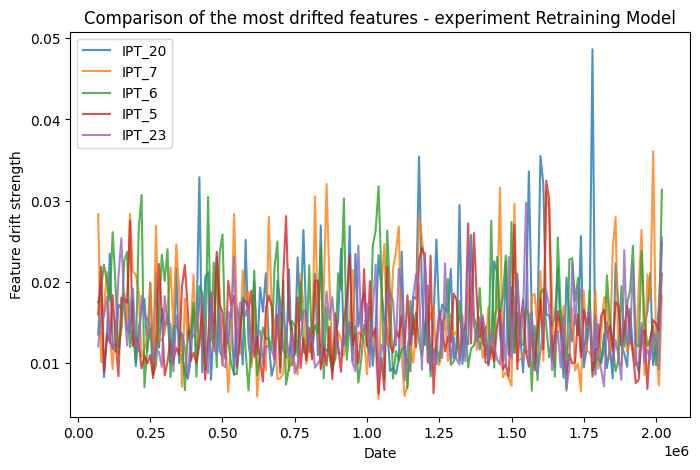

Most drifted features:

Experiment Reference Model
IPT_20    0.015588
IPT_7     0.015204
IPT_6     0.015117
IPT_5     0.014336
IPT_23    0.014081
dtype: float64

 Compare drifts between experiments:


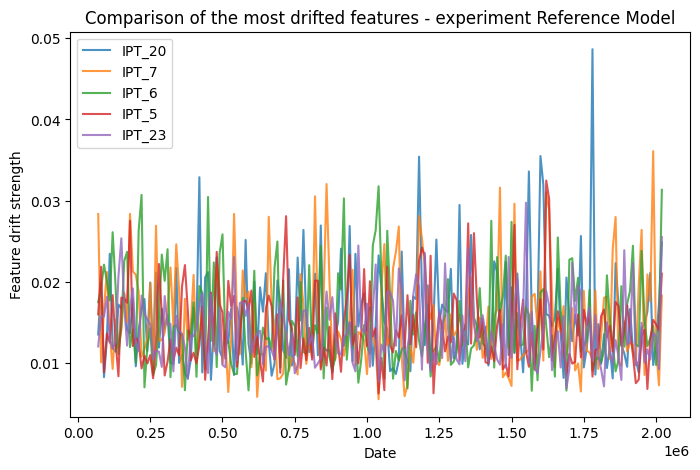

In [6]:
reporter_retrained.analyse_feature_drift(5)

reporter_reference.analyse_feature_drift(5)

In [66]:
#reporter.plot_feature_comparison("SIZE_4")

In [22]:
#Example of multifeature support
#reporter.plot_feature(["SIZE_5","DIR_3"])

# Detailed logs

In [17]:
detailed_logs_retrained = logger_retrained[0].get_logs()

detailed_logs_reference = logger_reference[0].get_logs()

In [19]:
#display(detailed_logs["description"])
#display(detailed_logs["overview"])
#display(detailed_logs["test_info"])
#detailed_logs["global_drift"]
#detailed_logs["class_drift"]
#detailed_logs["class_shares"]
#detailed_logs["class_f1"]
#detailed_logs["feature_drift"]

In [18]:
detailed_logs_retrained["global_drift"][detailed_logs_retrained["global_drift"]["is_drifted"] == True ]

Empty DataFrame
Columns: [is_drifted, drift_strength, share_drifted_features, f1]
Index: []

In [19]:
detailed_logs_reference["global_drift"][detailed_logs_reference["global_drift"]["is_drifted"] == False ]

is_drifted  drift_strength  share_drifted_features       f1
70000         False        0.009423                     0.0  0.99890
80000         False        0.011139                     0.0  0.99870
90000         False        0.009915                     0.0  0.99830
100000        False        0.011806                     0.0  0.99830
110000        False        0.012826                     0.0  0.99890
...             ...             ...                     ...      ...
1980000       False        0.013888                     0.0  0.99860
1990000       False        0.008146                     0.0  0.99890
2000000       False        0.012502                     0.0  0.99880
2010000       False        0.014685                     0.0  0.99870
2020000       False        0.014001                     0.0  0.99898

[196 rows x 4 columns]